# **Proyecto Sprint 6:**

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

## **Inicialización:**

### **Librerías**

In [ ]:
# Cargando librerías:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import seaborn as sns
from scipy import stats

### **Cargando DataFrame**

In [2]:
# Cargando datos:
games = pd.read_csv('datasets/games.csv')

### **Vista previa de los datos**

In [3]:
games.info()
display(games.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4130,Alien Trilogy,PS,1996.0,Shooter,0.24,0.16,0.04,0.03,NaN,NaN,NaN
4999,Phoenix Wright: Ace Attorney - Dual Destinies,3DS,2013.0,Adventure,0.00,0.00,0.38,0.00,NaN,NaN,NaN
1564,WWE '12,X360,2011.0,Fighting,0.74,0.40,0.00,0.12,71.0,6.3,T
2829,Total War: Rome II,PC,2013.0,Strategy,0.12,0.53,0.00,0.07,76.0,4.2,T
9968,Armored Core: Verdict Day,PS3,2013.0,Simulation,0.00,0.00,0.12,0.00,66.0,7.4,T


### **Descripción inicial**

***Estas son algunas observaciones acerca de los datos proporcionados, existen varios ajustes por hacer que se enlistan a continuación:***

- *Existen valores ausentes en varias columnas.*

- *Revisar la existencia de valores duplicados explícitos e implícitos.*

- *Se debe unificar el formato de todas las columnas a `lower_case` para facilitar su uso y evitar errores.*

- *La columna `Year_of_Release` es de tipo `float`, debe cambiarse a tipo `int` para un mejor manejo de estos datos.*

- *La columna `User_Score` es de tipo `object`, debe cambiarse a tipo `float` para poder realizar operaciones y cálculos de forma correcta.*

- *La columna `Critic_Score` es de tipo `float` pero todos los datos que incluye son enteros, por lo que se debe cambiar a tipo `int64` (O también se puede dividir entre 10 para que esté en el mismo orden de valores que la columna `User_Score` que va de 0-10).*

## **Preparación de datos:**

### **Nombres de columnas**

In [4]:
# Reemplazando los nombres de las columnas (minúsculas)
games.columns = games.columns.str.lower()

### **Convertir datos**

In [5]:
# Convirtiendo los datos de la columna "year_of_release" a int
games["year_of_release"] = games["year_of_release"].astype("Int64")

# Convirtiendo los datos de la columna "user_score" a float
    # Reemplazando 'tbd' por NaN
games['user_score'] = games['user_score'].replace('tbd', np.nan)
    # Convirtiendo los datos de la columna "user_score" a float
games["user_score"] = games["user_score"].astype("Float64")

# Columna "critic_score"
    # Dividiendo entre 10 para que se maneje de 0-10
games['critic_score'] = games['critic_score'] / 10

***Comentario:***

- *La columna `Year_of_Release` se cambió a tipo int para optimizar el uso de la memoria y permitir comparaciones lógicas del tipo < ó >.*

- *La columna `user_score` se cambió al tipo float para permitir operaciones aritméticas. Para esto, fue necesario sustituir los valores de "tbd" por NaN (que mas adelante serán trabajados).*

### **Valores Ausentes**

In [6]:
# Revisando valores ausentes en cada columna.
display(games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

####  **Columnas "name" y "genre"**

In [7]:
# Valores ausentes en columna "name"
games[games['name'].isna()]
#games.query('platform == "GEN"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,<NA>,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,<NA>,NaN


In [8]:
# Valores ausentes en columna "genre"
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,<NA>,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,<NA>,NaN


***Comentario:***

*Se observa que los valores ausentes de las columnas `name` y `genre` coinciden en 2 registros. Ademas, estos dos registros coinciden en `platform` y  `year_of_release`. Probablemente se trate del mismo juego y por lo tanto eliminaré ambos registros ya que no ofrecen mucha información y su ausencia no afectará nuestro análisis.*

In [9]:
# Manejo de NaN en columnas "name" y "genre"
    # Eliminando registros que tienen datos nulos en "name" y "genre"
games.dropna(subset=['name', 'genre'], inplace=True)

#### **Columna "year_of_release"**

***Comentario:***

*Se observa que existen 269 datos ausentes para la columna `year_of_release` pero en algunos casos, el año de lanzamiento se puede inferir a partir de el nombre del videojuego en la columna `name`.*

In [10]:
# Manejo de datos ausentes en la columna "year_of_release"    
    # Extrayendo los años de lanzamiento a partir de la columna "name"
games['inferred_year'] = games['name'].str.extract(r'(\d{4})').astype(float)
    # Restando uno (1) a cada valor extraido.
games['inferred_year'] = games['inferred_year'] - 1
    # Asignando los valores obtenidos a la columna "year_of_release"
games['year_of_release'] = games['year_of_release'].fillna(games['inferred_year'])
    # Eliminando la columna auxiliar "inferred_year"
games.drop(columns='inferred_year', inplace=True)

***Comentario:***

*Después de inferir algunos de los años de lanzamiento a partir del nombre, el numero de datos ausentes ahora es de 252.*

*Además, es posible inferir el año de lanzamiento de un juego basándose en la fecha en que fue publicado en otras plataformas. Sin embargo, esto no siempre es preciso, ya que un mismo título puede salir en años distintos dependiendo de la plataforma. Por lo tanto, asignar un año de lanzamiento únicamente tomando como referencia otra plataforma puede llevar a errores.*

*Para terminar, los datos que aun siguen ausentes serán sustituídos por el número 0. De esta forma la información de ventas seguirá siendo útil para hacer cálculos en relación con las columna de `genre` o `platform`.*

In [11]:
games['year_of_release'] = games['year_of_release'].fillna(0)

#### **Columna "critic_score"**

*Existen ahora 8576 datos ausentes en la columna `critic_score`, que representan mas de la mitad de los datos. Se requiere realizar un análisis en busqueda de algun patrón que pueda explicar esta situación.*

In [12]:
print(games[games['critic_score'].isna()]['platform'].value_counts().head(10))
print(games[games['critic_score'].isna()]['year_of_release'].value_counts().head(10))
print(games[games['critic_score'].isna()]['genre'].value_counts().head(10))

platform
DS      1434
PS       997
PS2      863
PSP      747
Wii      735
PS3      511
GBA      384
3DS      352
X360     346
N64      319
Name: count, dtype: int64
year_of_release
2009    775
2010    755
2008    713
2011    636
2007    506
2006    387
2015    381
1998    351
2012    332
2014    320
Name: count, dtype: Int64
genre
Action          1479
Misc            1227
Sports          1154
Adventure        980
Role-Playing     761
Simulation       521
Racing           507
Fighting         440
Platform         391
Strategy         381
Name: count, dtype: int64


***Comentario:***

*Se observa que la plataforma 'DS' presenta la mayor cantidad de datos ausentes. Del mismo modo, se observa que la mayor cantidad de datos asentes se concentra en los años de 2006-2011. Parece ser que durante esos años no se realizaron muchas reseñas por parte de la crítica.*

*Considero que una buena solucion es asignar el valor de la mediana de acuerdo al genero que pertenece.*

In [13]:
# Valores ausentes en columna "critic_score".
    # Creando series que contenga la mediana de la "critic_score" para cada género
critic_score_genre_median = games.groupby(by='genre')["critic_score"].median()
    # Sustituyendo cada valor ausente en la columna por la mediana de acuerdo a su género.
games["critic_score"] = games["critic_score"].fillna(games['genre'].map(critic_score_genre_median))
print('Valores ausentes en "critic_score":', games["critic_score"].isna().sum())

Valores ausentes en "critic_score": 0


***Comentario:***

*De esta forma sustituímos todos los valores ausentes en la columna `critic_score`.*

#### **Columna "user_score"**

Existen ahora 9123 datos ausentes en la columna `user_score`. Se requiere realizar un análisis en busqueda de algun patrón que pueda explicar esta situación.

In [14]:
print(games.query("user_score.isna()")['platform'].value_counts().head(5))
print(games.query("user_score.isna()")['year_of_release'].value_counts().head(5))
print(games.query("user_score.isna()")['genre'].value_counts().head(5))

platform
DS     1635
PS     1035
PS2     920
PSP     788
Wii     760
Name: count, dtype: int64
year_of_release
2009    812
2010    788
2008    767
2011    635
2007    570
Name: count, dtype: Int64
genre
Action          1539
Misc            1311
Sports          1245
Adventure       1003
Role-Playing     755
Name: count, dtype: int64


***Comentario:***

*Nuevamente se observa que los años de 2007-2011 son en los que mas reseñas hacen falta, esta vez las calificaciones de los usuarios. Considero que una buena solucion es asignar el valor de la mediana de acuerdo al genero que pertenece.*

In [15]:
# Valores ausentes en columna user_score".
    # Creando series que contenga la mediana de la "user_score" para cada género
user_score_genre_median = games.groupby('genre')['user_score'].median()
    # Sustituyendo cada valor ausente en la columna por la mediana de acuerdo a su género.
games['user_score'] = games['user_score'].fillna(games['genre'].map(user_score_genre_median))
print('Valores ausentes en "user_score":', games["user_score"].isna().sum())

Valores ausentes en "user_score": 0


***Comentario:***

*De esta forma sustituímos todos los valores ausentes en la columna `user_score`.*

#### **Columna "rating"**

*Existen ahora 6766 valores ausentes en la columna `rating`. Se trata de una columna tipo `object` en la que se asigna una categoría a cada videojuego, por lo que los valores ausentes serán sustituídos por el string "tbd".*

In [16]:
games['rating'] = games['rating'].fillna('tbd')

### **Valores duplicados**

In [17]:
print('Número de registros duplicados:', games.duplicated().sum())

Número de registros duplicados: 0


### **Calculo ventas totales**

In [18]:
# Calculando las ventas totales para cada juego
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

## **Análisis de datos:**

### **¿Cuántos juegos fueron lanzados en diferentes años?**

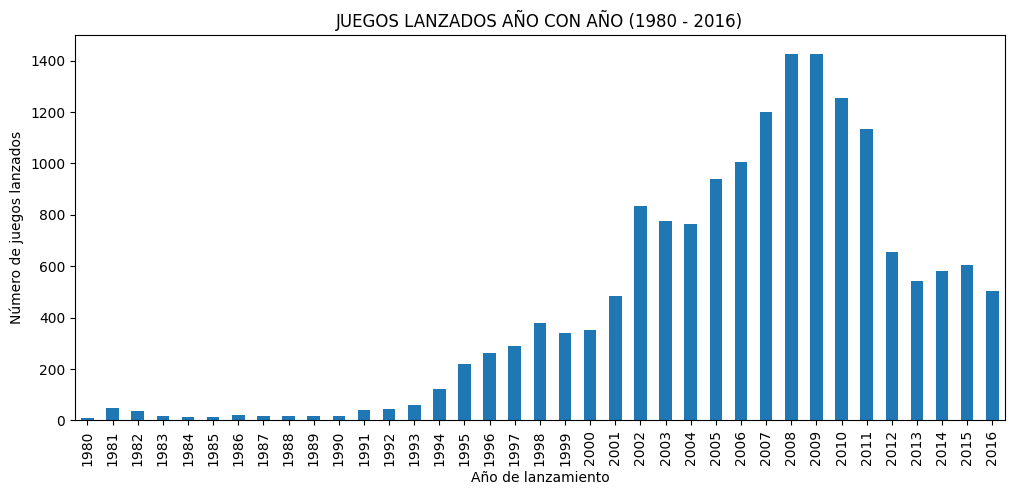

In [19]:
# Agrupando por año para contar el número de videojuegos lanzados cada año
games_released_by_year = games.query('year_of_release != 0').groupby('year_of_release')['name'].count()
# Graficando
games_released_by_year.plot(kind='bar',
                            title='JUEGOS LANZADOS AÑO CON AÑO (1980 - 2016)', 
                            xlabel='Año de lanzamiento',
                            ylabel='Número de juegos lanzados',
                            figsize=(12,5))

plt.show()

**¿Son significativos los datos de cada período?**

*Se observa que el desarrollo de videojuegos comenzó un incremento significativo a mediados de la década de los 90's. Teniendo su crecimiento mas grande entre el 2005 y el 2011, donde el año en el que mas videojuegos fueron lanzados fue 2008. Después de esto, se observa que el ritmo bajó drasticamente.*

### **Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución  basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas.**

C:\Users\edgar\AppData\Local\Temp\ipykernel_6524\3634219694.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top10_platforms_historic_sales = (games


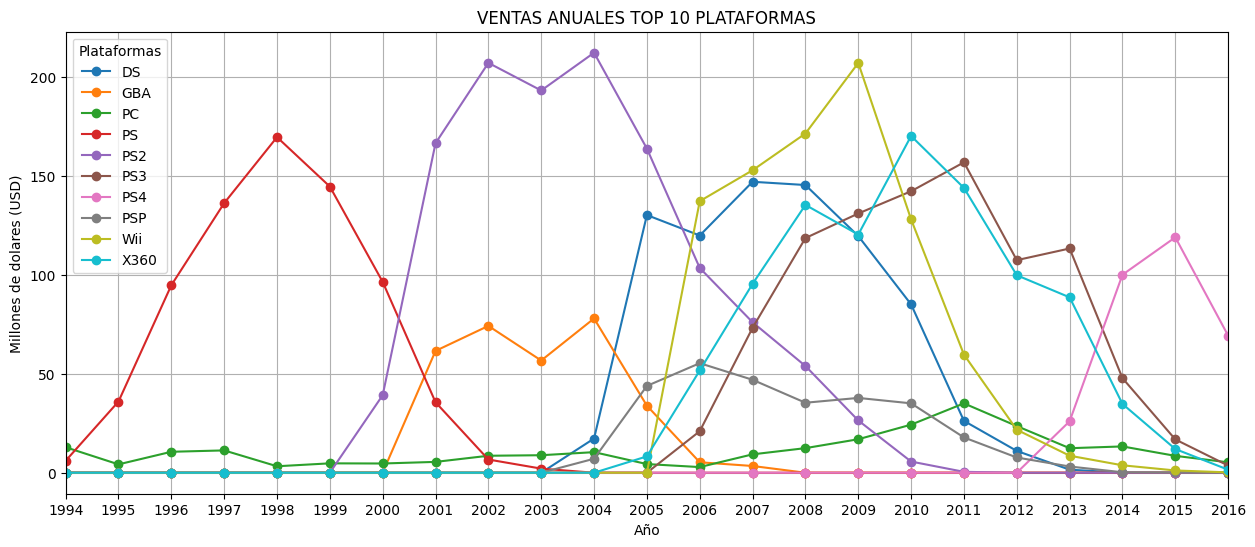

In [20]:
# Determinando las plataformas con las mayores ventas totales
    # Agrupando ventas por plataforma y ordenando para ubicar las plataformas con mas ventas históricas
platforms_sales = (games
                   #.query('year_of_release != 0')
                   .groupby('platform')[
                       ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']
                       ]
                   .sum().sort_values(by='total_sales', ascending=False)
                   )
    # Obteniendo lista con los nombres de las top 10 plataformas.

top10_platforms = platforms_sales.head(10)
top10_platforms_list = top10_platforms.index

# Distribución basada en los datos de cada año
    # Agrupando por año y plataforma unicamente las 10 plataformas con mas ventas históricas
top10_platforms_historic_sales = (games
                                  .query('year_of_release != 0')
                                  [games['platform'].isin(top10_platforms_list)]
                                  .groupby(['year_of_release', 'platform'])['total_sales']
                                  .sum().reset_index()
                                  )
    # Creando una pivot table
top10_platforms_historic_sales = (top10_platforms_historic_sales
                                  .query('year_of_release >= 1994')
                                  .pivot_table(values='total_sales',index='year_of_release',columns='platform',aggfunc='sum')
                                  .fillna(0))

#display(top10_platforms_historic_sales)
    # Graficando
top10_platforms_historic_sales.plot(title='VENTAS ANUALES TOP 10 PLATAFORMAS',
                                    ylabel='Millones de dolares (USD)', 
                                    xticks=top10_platforms_historic_sales.groupby('year_of_release').sum().index,
                                    xlabel='Año',  
                                    figsize=(15,6), 
                                    grid=True,
                                    xlim=(1994, 2016),
                                    marker = 'o')

plt.legend(title='Plataformas', loc='upper left', fontsize= 'medium')
plt.show()

**¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?**

*A partir del gráfico es posible afirmar que, considerando las 10 plataformas con mayores ventas totales, varias de las plataformas como PS, PS2 y Wii, tuvieron su época siendo las mas populares del momento, la gráfica nos muestra como, en su mayoría, las ventas de las plataformas de videojuegos tienen una distribución normal.*

*Además, se aprecia que las nuevas consolas suelen tardar alrededor de cuatro años en alcanzar su pico de ventas, para luego disminuir gradualmente durante los siguientes cuatro años.*

### **Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.**

*El verdadero crecimiento en el desarrollo y lanzamiento de nuevos videojuegos comenzó en 1994. A partir de ese año, la cantidad de títulos lanzados fue en aumento, alcanzando un pico en 2008. En los años posteriores, se observa una tendencia a la baja en el número de lanzamientos. Por esta razón, considero que el periodo de 1994 a 2016 es el más representativo.*

### **¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?**

In [21]:
display(top10_platforms_historic_sales)

print('>>>>>>>>> Las plataformas líderes en ventas históricas son: <<<<<<<<<')
print()
i = 0
for platform in top10_platforms_list:
    i+=1
    print(i,'.-',platform)

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1994,0.00,0.00,12.87,6.03,0.00,0.00,0.00,0.00,0.00,0.00
1995,0.00,0.00,4.22,35.96,0.00,0.00,0.00,0.00,0.00,0.00
1996,0.00,0.00,10.58,94.70,0.00,0.00,0.00,0.00,0.00,0.00
1997,0.00,0.00,11.27,136.17,0.00,0.00,0.00,0.00,0.00,0.00
1998,0.00,0.00,3.26,169.49,0.00,0.00,0.00,0.00,0.00,0.00
1999,0.00,0.00,4.74,144.53,0.00,0.00,0.00,0.00,0.00,0.00
2000,0.00,0.07,4.66,96.37,39.17,0.00,0.00,0.00,0.00,0.00
2001,0.00,61.53,5.47,35.59,166.43,0.00,0.00,0.00,0.00,0.00
2002,0.00,74.16,8.57,6.67,207.00,0.00,0.00,0.00,0.00,0.00


>>>>>>>>> Las plataformas líderes en ventas históricas son: <<<<<<<<<

1 .- PS2
2 .- X360
3 .- PS3
4 .- Wii
5 .- DS
6 .- PS
7 .- GBA
8 .- PS4
9 .- PSP
10 .- PC


*En años recientes, solo la PS4 podría considerarse una plataforma todavía rentable. Las demás ya tuvieron su mejor momento: llegaron a su pico de ventas y luego empezaron a vender cada vez menos.*

**Plataformas potencialmente rentables:**

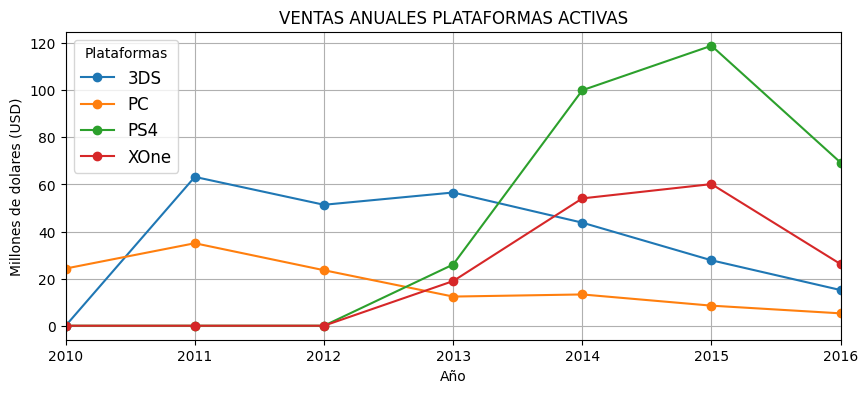

In [22]:
# Agrupando las ventas por plataforma y por año.
platforms_sales_by_year = (games
                           .query('year_of_release != 0')
                           .groupby(['platform', 'year_of_release']) [
                               ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']
                            ]
                           .sum().reset_index()
                           )

# Creando un pivot_table para mejor visualización
platforms_total_sales_by_year_pivot = platforms_sales_by_year.pivot_table(values='total_sales', columns='platform', index='year_of_release').fillna(0)

# Obteniendo los nombres de las plataformas que tuvieron mas ventas en 2016
significant_sales_2016_plarforms_names = platforms_total_sales_by_year_pivot.loc[[2016], platforms_total_sales_by_year_pivot.loc[2016] > 5].columns

# Creando gráfico que muestre el comportamiento de las plataformas que tuvieron mas ventas en 2016
platforms_total_sales_by_year_pivot.loc[:,significant_sales_2016_plarforms_names].plot(title='VENTAS ANUALES PLATAFORMAS ACTIVAS',
                                                                                       ylabel='Millones de dolares (USD)', 
                                                                                       xticks=top10_platforms_historic_sales.groupby('year_of_release').sum().index,
                                                                                       xlabel='Año',  
                                                                                       figsize=(10,4), 
                                                                                       grid=True,
                                                                                       xlim=(2010, 2016),
                                                                                       marker = 'o')

plt.legend(title='Plataformas', loc='upper left', fontsize="large")
plt.show()

*El gráfico muestra el comportamiento reciente de las plataformas que superaron los 5 millones de dólares (USD) en ventas durante el año 2016. Estas plataformas fueron:*
- **Nintendo 3DS**
- **PC**
- **PlayStation 4** 
- **Xbox One.**

*Se observa una tendencia general a la baja en las ventas de todas ellas. No obstante, tanto* **PlayStation 4** *como* **Xbox One** *continúan mostrando un rendimiento significativo, por lo que pueden considerarse plataformas* **potencialmente rentables.**

*En cuanto a la plataforma* **PC** *, destaca por ser la única que ha permanecido activa durante tres décadas, aunque con niveles de venta más discretos. Esta estabilidad en el tiempo también la convierte en una opción a considerar como* **potencialmente rentable.**

### **Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas?**



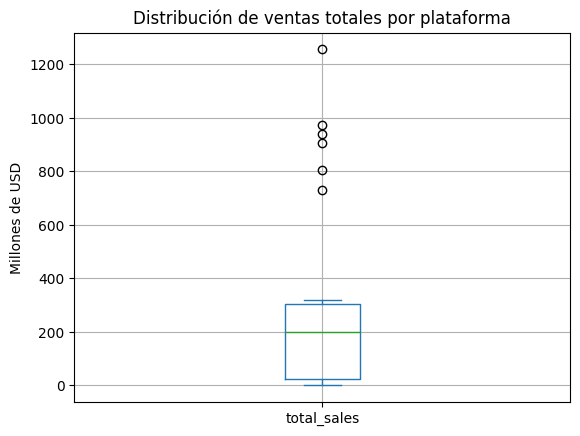

In [23]:
# Crando un diagrama de cajas para las ventas totales por plataforma
platforms_sales['total_sales'].plot(kind='box')

plt.title('Distribución de ventas totales por plataforma')
plt.ylabel('Millones de USD')
plt.grid(True)
plt.show()

*El diagrama de caja anterior permite observar que existen 6 valores anómalos o outliers, los cuales se separan **significativamente** de la tendencia de comportamiento de las ventas de las demás plataformas. Estas son:*

In [24]:
display(platforms_sales['total_sales'].reset_index().head(6))

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86


**¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.**

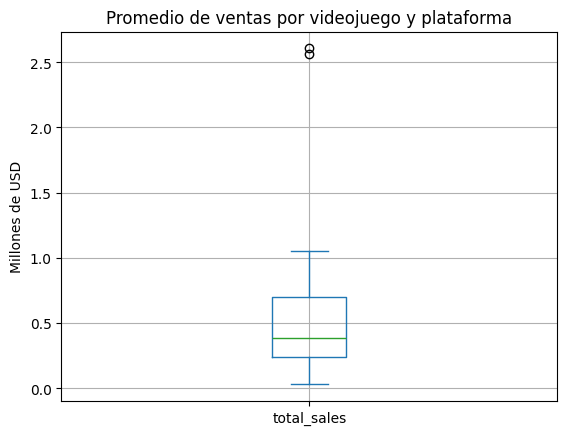

In [25]:
# Obteniendo las ventas promedio por videojuego para cada plataforma
avg_sales_per_platform = games.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

# Crando un diagrama de cajas para las ventas promedio por videojuego para cada plataforma
avg_sales_per_platform.plot(kind='box')

plt.title('Promedio de ventas por videojuego y plataforma')
plt.ylabel('Millones de USD')
plt.grid(True)
plt.show()

*Se observa que existen 2 plataformas que tienen un promedio de ventas por videojuego lanzado **significativamente** mas altos que el resto y se visualizan como outliers en el grafico anterior. Estas son:*

In [26]:
display(avg_sales_per_platform.reset_index().head(2))

,platform,total_sales
0,GB,2.606735
1,NES,2.561735


### **Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.**



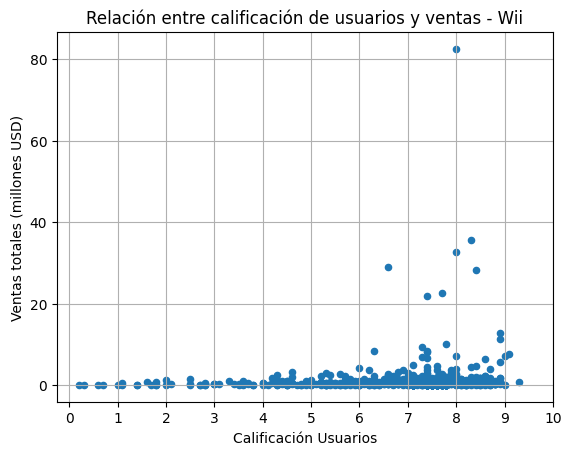

Correlación entre user_score y total_sales: 0.06


In [27]:
# Filtrando la plataforma Wii
wii_games = games.query('platform == "Wii"')

# Correlación entre calificaciones y ventas
cor_user = wii_games[['user_score', 'total_sales']].corr().iloc[0,1]
cor_critic = wii_games[['critic_score', 'total_sales']].corr().iloc[0,1]

# Graficando relación 'user_score' vs 'total_sales'
wii_games.plot(kind='scatter', 
               x='user_score', 
               xlabel='Calificación Usuarios',
               xticks=[0,1,2,3,4,5,6,7,8,9,10], 
               y='total_sales', 
               ylabel='Ventas totales (millones USD)', 
               title='Relación entre calificación de usuarios y ventas - Wii',
               grid=True)
plt.show()

print(f"Correlación entre user_score y total_sales: {cor_user:.2f}")

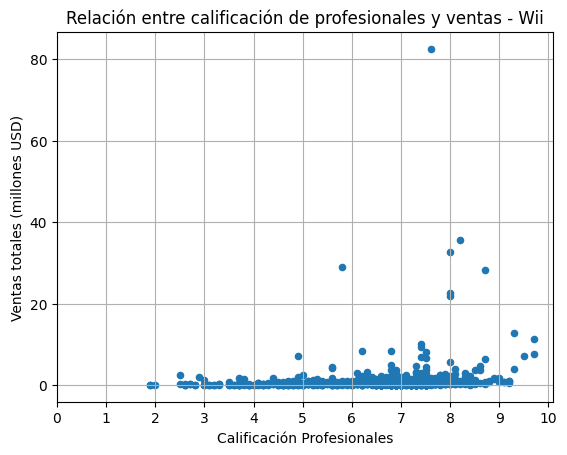

Correlación entre critic_score y total_sales: 0.11


In [28]:
# Graficando relación 'critic_score' vs 'total_sales'
wii_games.plot(kind='scatter', 
               x='critic_score', 
               xlabel='Calificación Profesionales',
               xticks=[0,1,2,3,4,5,6,7,8,9,10],  
               y='total_sales', 
               ylabel='Ventas totales (millones USD)', 
               title='Relación entre calificación de profesionales y ventas - Wii',
               grid=True)
plt.show()

print(f"Correlación entre critic_score y total_sales: {cor_critic:.2f}")

*Se observa que **no hay una correlación fuerte** entre las calificaciones y las ventas totales de los videojuegos. Aunque sí existe una correlación positiva, esta es bastante débil. Cabe destacar que la relación es ligeramente más fuerte con las calificaciones de la crítica profesional que con las de los usuarios.*

### **Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.**



In [29]:
# Encontrando cuales juegos se lanzaron en mas de una plataforma
multiplatform_games_list = games['name'].value_counts()
multiplatform_games_list = multiplatform_games_list[multiplatform_games_list > 1].index

# Encontrando los juegos multiplataforma que están en Wii
wii_multiplatform_games_list = games[(games['name'].isin(multiplatform_games_list)) & (games['platform'] == 'Wii')]
wii_multiplatform_games_list = wii_multiplatform_games_list['name'].unique()

# Creando DataFrame con juegos multiplataforma que están en Wii
wii_multiplatform_games = games.query('name in @wii_multiplatform_games_list')

In [30]:
# Agrupando por nombre de juego y por plataforma
comparison_platforms = ['X360', 'PS3', 'Wii'] # Plataformas que compiten con Wii

wii_multiplatform_games_comparison = wii_multiplatform_games.query('platform in @comparison_platforms')
wii_multiplatform_games_comparison = (wii_multiplatform_games_comparison
                                      .groupby(['name', 'platform'])['total_sales']
                                      .sum().reset_index())
# Creando pivot_table
wii_multiplatform_games_comparison_sales_pivot = (wii_multiplatform_games_comparison
                                                  .pivot_table(values='total_sales',
                                                               columns='platform',
                                                               index='name')
                                                               .dropna())

In [31]:
# Obteniendo lista de nombres de los juegos que tienen ventas en ['X360', 'PS3', 'Wii']
wii_multiplatform_games_comparison_list = wii_multiplatform_games_comparison_sales_pivot.index
# Agrupando por 'name' para obtener la venta total de cada videojuego de la lista
wii_multiplatform_games_comparison_total_sales = (games[games['name']
                                                        .isin(wii_multiplatform_games_comparison_list)]
                                                        .groupby('name')['total_sales'].sum())

# Agregando columna 'total_sales' a pivot_table
wii_multiplatform_games_comparison_sales_pivot['total_sales'] = wii_multiplatform_games_comparison_total_sales
# Ordenando a partir de la columna 'total_sales'
wii_multiplatform_games_comparison_sales_pivot.sort_values('total_sales', ascending=False, inplace=True)

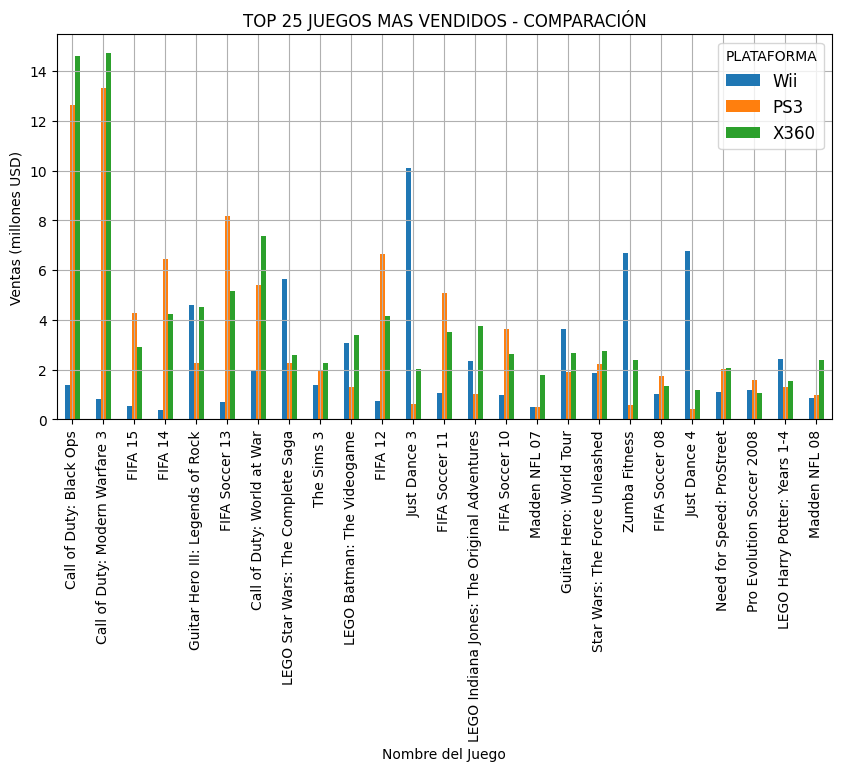

In [32]:
# Graficando
wii_multiplatform_games_comparison_sales_pivot[['Wii', 'PS3', 'X360']].head(25).plot(kind='bar',
                                                                                     title='TOP 25 JUEGOS MAS VENDIDOS - COMPARACIÓN',
                                                                                     xlabel='Nombre del Juego',
                                                                                     ylabel='Ventas (millones USD)',
                                                                                     grid=True,
                                                                                     figsize=(10,5))

plt.legend(title='PLATAFORMA', fontsize='large')
plt.show()


*La gráfica muestra las ventas por plataforma de los juegos multiplataforma más vendidos que estuvieron disponibles en Wii, PS3 y Xbox 360.*

*Se observa que durante esta generación de videojuegos, los juegos mas vendidos fueron principalmente comprados para la PS3 y Xbox 360. La consola Wii es la favorita para juegos como de un tono mas familiar como los "LEGO" o de baile y ritmo como ""Zumba Fitness", "Just Dance" y "Guitar Hero".*

### **Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?**

In [33]:
# Agrupando y ordenando por género para mostrar las ventas por región.
genre_sales = games.groupby('genre')[['na_sales','eu_sales','jp_sales','other_sales', 'total_sales']].sum().reset_index()
genre_sales.sort_values('total_sales', ascending=False, inplace=True)
# Agrupando y ordenando por género para mostrar el promedio de ventas por región.
genre_mean_sales = games.groupby('genre')['total_sales'].mean().reset_index()
genre_mean_sales.columns = ['genre', 'mean_sales']
genre_mean_sales.sort_values('mean_sales', ascending=False, inplace=True)


print('>>>>> Top 5 generos con mas ventas <<<<<')
display(genre_sales[['genre', 'total_sales']].head(5))
print()

print('>>>>> Top 5 generos con mejor promedio de ventas por videojuego <<<<<')
display(genre_mean_sales.head(5))


>>>>> Top 5 generos con mas ventas <<<<<


,genre,total_sales
0,Action,1744.17
10,Sports,1331.27
8,Shooter,1052.45
7,Role-Playing,934.56
4,Platform,827.77



>>>>> Top 5 generos con mejor promedio de ventas por videojuego <<<<<


,genre,mean_sales
4,Platform,0.932173
8,Shooter,0.795503
7,Role-Playing,0.623872
6,Racing,0.583403
10,Sports,0.566980


*Determinar cuales son los géneros mas rentables puede tener 2 enfoques diferentes:*

- *Género que mas ventas ha tenido en general*
- *Género que mas ventas genera por cada videojuego que se lanza (promedio)*

*Desde el punto de vista de una tienda que no desarrolla videojuegos si no únicamente los distribuye, el enfoque ideal sería conocer cuales son los géneros que tienen mas ventas en general (volumen total de ventas.)*

*Me parece interesante conocer cuales son los generos que cuentan con los volumenes de venta mayor y además cuentan con un promedio de ventas alto, como lo son:*

- *Platform*
- *Shooter*
- *Role-Playing*
- *Sports*

*Llama la atención que **"Action"** a pesar de ser el genero con mayor volumen de ventas con difencia, no aparece en el top 5 de mejores promedios de venta.*

*A mi parecer, el genero **"Shooter"** es muy atractivo debido a que tiene ventas muy altas (Top 3) y un promedio por videojuegos muy competitivo (Top 2).*

## **Perfil de usuario para cada región**

### **Para cada región (NA, UE, JP) determina las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.**


In [34]:
# Agrupando y sumando las ventas para cada plataforma en cada región.
platform_sales_by_region = games.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales', 'total_sales']].sum()

# Obteniendo el top 5 de plataformas principales para cada región.
    # Región NA
top5_platform_na = platform_sales_by_region['na_sales'].sort_values(ascending=False).reset_index().head(5)
top5_platform_na = top5_platform_na.merge(platform_sales_by_region['total_sales'].reset_index(), on='platform')
        # Calculando cuota de mercado (Porcentaje de aportación)
top5_platform_na['market_share'] = ((top5_platform_na['na_sales'] / top5_platform_na['total_sales']) * 100).round(2)

print('>>> Region NA - Plataformas principales <<<')
display(top5_platform_na)
    
    # Región EU
top5_platform_eu = platform_sales_by_region['eu_sales'].sort_values(ascending=False).reset_index().head(5)
top5_platform_eu = top5_platform_eu.merge(platform_sales_by_region['total_sales'].reset_index(), on='platform')
        # Calculando cuota de mercado (Porcentaje de aportación)
top5_platform_eu['market_share'] = ((top5_platform_eu['eu_sales'] / top5_platform_eu['total_sales']) * 100).round(2)

print('>>> Region EU - Plataformas principales <<<')
display(top5_platform_eu)

    # Región JP
top5_platform_jp = platform_sales_by_region['jp_sales'].sort_values(ascending=False).reset_index().head(5)
top5_platform_jp = top5_platform_jp.merge(platform_sales_by_region['total_sales'].reset_index(), on='platform')
        # Calculando cuota de mercado (Porcentaje de aportación)
top5_platform_jp['market_share'] = ((top5_platform_jp['jp_sales'] / top5_platform_jp['total_sales']) * 100).round(2)

print('>>> Region JP - Plataformas principales <<<')
display(top5_platform_jp)

    # Región other
top5_platform_other = platform_sales_by_region['other_sales'].sort_values(ascending=False).reset_index().head(5)
top5_platform_other = top5_platform_other.merge(platform_sales_by_region['total_sales'].reset_index(), on='platform')
        # Calculando cuota de mercado (Porcentaje de aportación)
top5_platform_other['market_share'] = ((top5_platform_other['other_sales'] / top5_platform_other['total_sales']) * 100).round(2)

print('>>> Resto del mundo - Plataformas principales <<<')
display(top5_platform_other)

>>> Region NA - Plataformas principales <<<


,platform,na_sales,total_sales,market_share
0,X360,602.47,971.42,62.02
1,PS2,583.84,1255.77,46.49
2,Wii,496.90,907.51,54.75
3,PS3,393.49,939.65,41.88
4,DS,382.40,806.12,47.44


>>> Region EU - Plataformas principales <<<


,platform,eu_sales,total_sales,market_share
0,PS2,339.29,1255.77,27.02
1,PS3,330.29,939.65,35.15
2,X360,270.76,971.42,27.87
3,Wii,262.21,907.51,28.89
4,PS,213.61,730.86,29.23


>>> Region JP - Plataformas principales <<<


,platform,jp_sales,total_sales,market_share
0,DS,175.57,806.12,21.78
1,PS,139.82,730.86,19.13
2,PS2,139.20,1255.77,11.08
3,SNES,116.55,200.04,58.26
4,3DS,100.67,259.00,38.87


>>> Resto del mundo - Plataformas principales <<<


,platform,other_sales,total_sales,market_share
0,PS2,193.44,1255.77,15.40
1,PS3,135.68,939.65,14.44
2,X360,85.76,971.42,8.83
3,Wii,79.07,907.51,8.71
4,DS,59.26,806.12,7.35


***Región Norte América (NA):***

- *La plataforma con mas ventas es Xbox 360 y representa un 62% de aporte a las ventas totales.*
- *Para sus 5 plataformas mas importantes, se observan porcentajes de aportación altos, cercanos al 50%, lo que se interpreta como que el mercado américano es el mayor consumidor de videojuegos.*

***Región Europea (EU):***

- *La plataforma con mas ventas es PlayStation 2 y representa un 27% de aporte a las ventas totales.*
- *En esta región, la cuota de mercado mas alta es la del PlayStation 3 con un 35%. Esta es la segunda plataforma con mas ventas en Europa.*
- *En general, los porcentajes de aportación son medios, alrededor de 30%.*

***Región Japón (JP):***

- *La plataforma con mas ventas es Nintendo DS, con un porcentaje de aportación de 21.78% a las ventas totales de esta plataforma.*
- *Se observa que esta región representa el 58% de las ventas de la Nintendo SNES en todo el mundo. A pesar de ser la 4ta plataforma con mas ventas en esta región.*
- *Las cuotas de mercado son muy variables en esta región pero en general menores a NA y EU.*

***Resto del mundo (other):***

- *La plataforma con mas ventas es PS2, seguida de PS3 con cuotas de mercado de 15.4% y 14.44% respectivamente.*
- *En general el aporte a las ventas en estas regiones son muy bajos, alrededor de 10%.*

### **Para cada región (NA, UE, JP) determina los cinco géneros principales. Explica la diferencia.**


In [35]:
# Región NA
top5_genre_na = genre_sales[['genre', 'na_sales']].sort_values(by='na_sales',ascending=False).head(5)
print('>>> Region NA - Géneros principales <<<')
display(top5_genre_na)

# Región EU
top5_genre_eu = genre_sales[['genre', 'eu_sales']].sort_values(by='eu_sales',ascending=False).head(5)
print('>>> Region EU - Géneros principales <<<')
display(top5_genre_eu)

# Región JP
top5_genre_jp = genre_sales[['genre', 'jp_sales']].sort_values(by='jp_sales',ascending=False).head(5)
print('>>> Region JP - Géneros principales <<<')
display(top5_genre_jp)

# Región other
top5_genre_other = genre_sales[['genre', 'other_sales']].sort_values(by='other_sales',ascending=False).head(5)
print('>>> Resto del mundo - Géneros principales <<<')
display(top5_genre_other)

>>> Region NA - Géneros principales <<<


,genre,na_sales
0,Action,879.01
10,Sports,684.43
8,Shooter,592.24
4,Platform,445.50
3,Misc,407.27


>>> Region EU - Géneros principales <<<


,genre,eu_sales
0,Action,519.13
10,Sports,376.79
8,Shooter,317.34
6,Racing,236.51
3,Misc,212.74


>>> Region JP - Géneros principales <<<


,genre,jp_sales
7,Role-Playing,355.41
0,Action,161.43
10,Sports,135.54
4,Platform,130.83
3,Misc,108.11


>>> Resto del mundo - Géneros principales <<<


,genre,other_sales
0,Action,184.60
10,Sports,134.51
8,Shooter,104.11
6,Racing,76.10
3,Misc,74.39


- *En Norteamérica, Europa y el resto del mundo, los tres géneros que han generado más ventas son ***Action***, ***Sports*** y ***Shooter***.*

- *Japón es la única región donde esta tendencia cambia: el género más vendido es ***Role-Playing***, con $355.41 millones de dólares, seguido por ***Action*** y ***Sports***. En esta región, el género ***Shooter*** no goza de tanta popularidad.*

- *Además, Japón es la única región en la que ***Platform*** aparece dentro del top 5 de géneros más vendidos.*

### **Para cada región (NA, UE, JP) determina si las clasificaciones de ESRB afectan a las ventas en regiones individuales.**

In [36]:
# Agrupando por columna 'rating' y sumando las ventas totales para cada región
sales_by_rating = games.groupby('rating')[['na_sales','eu_sales','jp_sales','other_sales', 'total_sales']].sum().sort_values('total_sales', ascending=False)
display(sales_by_rating)
    # Eliminando los registros que están pendientes (tbd)
sales_by_rating.drop('tbd', inplace=True)
    # Obtiendo únicamente las ventas en las regiones
region_sales_by_rating = sales_by_rating.drop('total_sales', axis=1)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
rating,,,,,
tbd,1240.68,613.30,841.93,151.00,2846.91
E,1292.99,710.25,198.11,234.17,2435.52
T,759.75,427.03,151.40,155.17,1493.35
M,748.48,483.97,64.24,177.10,1473.79
E10+,353.32,188.52,40.20,73.56,655.60
K-A,2.56,0.27,1.46,0.03,4.32
AO,1.26,0.61,0.00,0.09,1.96
EC,1.53,0.11,0.00,0.11,1.75
RP,0.00,0.08,0.00,0.01,0.09


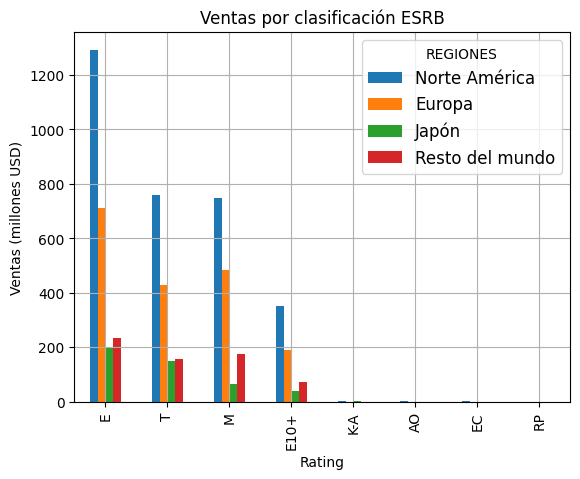

In [37]:
# Graficando
region_sales_by_rating.plot(kind='bar',
                            title='Ventas por clasificación ESRB',
                            xlabel='Rating',
                            ylabel='Ventas (millones USD)',
                            grid=True)

plt.legend(title='REGIONES', labels=['Norte América', 'Europa', 'Japón', 'Resto del mundo'], fontsize='large')
plt.show()

- *Se observa el dominio de el mercado **norte americano**, siendo el que genera mas ganancias en todas las clasificaciones, seguido de **Europa** y por último **Japón**. Este patrón de comportamiento se repite en las 4 principales clasificaciones: E, T, M y E10+.*

- *Considerando los datos de los juegos que ya tienen una clasificación asignada, observamos que las clasificaciones K-A, AO, EC y RP tienen ventas muy bajas y practicamente despresiables en todas las regiones.*

- *Se debe considerar que estas conclusiones pueden cambiar al asignar una clasificación a los títulos que tienen pendiente asignación (tbd).*

In [38]:
# Filtrando dataset para mostrar sólo aquellos jugos que no tienen un rating determinado
tbd_rating = games.query('rating == "tbd"')
print('Juegos sin clasificar (tbd):', len(tbd_rating))
# Calculando las ventas totales de estos juegos por región
tbd_rating_sales = tbd_rating.groupby('rating')[['na_sales','eu_sales','jp_sales','other_sales', 'total_sales']].sum()
tbd_rating_sales

Juegos sin clasificar (tbd): 6764


,na_sales,eu_sales,jp_sales,other_sales,total_sales
rating,,,,,
tbd,1240.68,613.3,841.93,151.0,2846.91


- *Llama la atención que hay un importante número de juegos sin clasificación (6,764). Con un número de ventas totales de $2,846.91 mdd.*

- *Llama la atención que **Japón** es la segunda mayor aportadora de ventas en juegos sin clasificación, superando a Europa y relativamente cerca de Norte América, que normalmente lo supera por mucho más, alrededor de 400%.*

- *Es posible que las clasificaciones faltantes correspondan a K-A, AO, EC y RP.*

## **Pruebas de Hipótesis**

### **Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

In [39]:
platform_user_score_mean = games.groupby('platform')['user_score'].mean().sort_values(ascending=False)

display(platform_user_score_mean[['XOne', 'PC']])

platform
XOne    6.761538
PC      7.161704
Name: user_score, dtype: Float64

**Hipótesis nula:**

- *Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.*

**Hipótesis alternativa:**

- *Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.*

In [40]:
# Obteniendo poblaciones a evaluar
xone_user_scores = games.query('platform == "XOne"')['user_score']
pc_user_scores = games.query('platform == "PC"')['user_score']
# Estableciendo valor alpha
alpha = 0.05
# Realizando ttest_ind()
resultado = stats.ttest_ind(xone_user_scores, pc_user_scores, equal_var=False)
# Valor p
print(f'p_value: {resultado.pvalue}.')
# Imprimiendo resultado de la prueba
if resultado.pvalue < alpha:
    print('RESULTADO: Se rechaza la hipótesis nula.')
else:
    print('RESULTADO: No se puede rechazar la hipótesis nula.')

p_value: 1.45285063989343e-05.
RESULTADO: Se rechaza la hipótesis nula.


### **Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

**Hipótesis nula:**

- *Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.*

**Hipótesis alternativa:**

- *Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.*

In [41]:
# Obteniendo poblaciones a evaluar
action_user_scores = games.query('genre == "Action"')['user_score']
sports_user_scores = games.query('genre == "Sports"')['user_score']
# Estableciendo valor alpha
alpha = 0.05
# Realizando ttest_ind()
resultado = stats.ttest_ind(action_user_scores, sports_user_scores, equal_var=False)
# Valor p
print(f'p_value: {resultado.pvalue}.')
# Imprimiendo resultado de la prueba
if resultado.pvalue < alpha:
    print('RESULTADO: Se rechaza la hipótesis nula.')
else:
    print('RESULTADO: No se puede rechazar la hipótesis nula.')

p_value: 0.5383281050121103.
RESULTADO: No se puede rechazar la hipótesis nula.


### **Explicación:**
- *La **hipótesis nula** es aquella que busca comprobar que **no hay una diferencia significativa** entre los promedios de dos poblaciones.*
- *La **hipótesis alternativa** busca comprobar que **si hay diferencia significativa** entre los promedios de dos poblaciones. Esta diferencia puede ser: mayor que (>), menor que(<) o como en este caso, simplemente diferente (!=).*

- *Para realizar las pruebas de hipótesis se utilizó el método de `ttest_ind` ya que se trata de una prueba **población vs población**. Además, la evaluación de el `p_value` obtenido se realiza directamente debido a que es una prueba de **dos colas**.*

## **Conclusión General**

- *La industria de los videojuegos ha experimentado un crecimiento acelerado desde mediados de los años 90, alcanzando su punto máximo en cuanto a lanzamientos entre 2005 y 2011. Desde entonces, el ritmo de lanzamientos ha disminuido, aunque aún se observan plataformas con un desempeño significativo, como ***PlayStation 4***, ***Xbox One***. En el caso de ***PC***, destaca por su permanencia a lo largo de tres décadas.*

- *En términos de ventas, las plataformas históricamente líderes son ***PlayStation2***, ***Xbox 360***, **PlayStation3**, ***Wii***, ***DS*** y **PlayStation**. Los análisis indican que las consolas alcanzan su pico de ventas en aproximadamente cuatro años, después de esto, sus ventas caen gradualmente durante 4 años mas hasta desaparecer.*

- *El mercado más fuerte es ***Norteamérica***, tanto en volumen de ventas como en participación proporcional. Le siguen Europa y Japón, donde se observan diferencias en las preferencias por géneros: mientras que en NA, EU y otras regiones dominan los géneros Action, Sports y Shooter, en Japón el Role-Playing ocupa el primer lugar. Los géneros más rentables a nivel global son Action, Sports, Shooter, Role-Playing y Platform.*

- *Mientras que las calificaciones promedio de los usuarios para las plataformas ***Xbox One*** y ***PC*** son significativamente diferentes, las calificaciones promedio de los usuarios para los géneros de ***Acción*** y ***Deportes*** son estadísticamente similares. Esto sugiere que la experiencia del usuario puede depender más de la plataforma que del género en sí.*